In [2]:
import tensorflow as tf
import cv2 as cv
import numpy as np

In [3]:
batch_size = 64
imageSize = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory('../asl_alphabet_train', seed=123, image_size=(imageSize, imageSize), batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory('../asl_alphabet_test', seed=123, image_size=(imageSize, imageSize), batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Found 29000 files belonging to 29 classes.


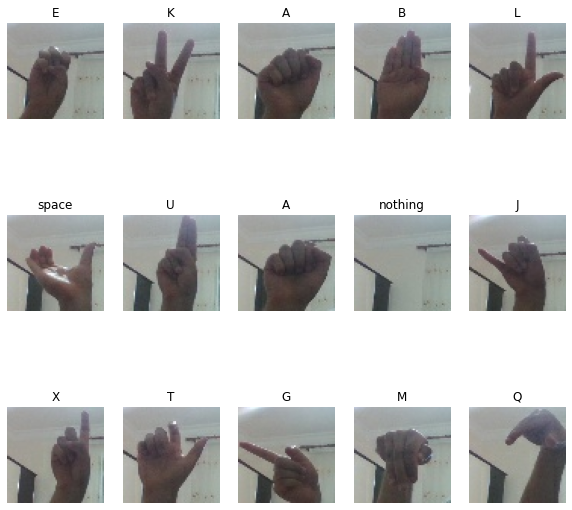

In [13]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
num_classes = 29

model = tf.keras.Sequential([
#   tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 5, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [5]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [6]:
model.fit(train_ds, validation_data=val_ds, epochs=3)

/home/rinald/.cache/pypoetry/virtualenvs/asl-translator-XVB9uddP-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Epoch 1/3


/home/rinald/.cache/pypoetry/virtualenvs/asl-translator-XVB9uddP-py3.8/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1360/1360 [==============================] - 397s 291ms/step - loss: 0.9247 - accuracy: 0.7646 - val_loss: 10.6978 - val_accuracy: 0.1364
Epoch 2/3
1360/1360 [==============================] - 355s 261ms/step - loss: 0.1224 - accuracy: 0.9601 - val_loss: 13.2475 - val_accuracy: 0.1830
Epoch 3/3
1360/1360 [==============================] - 391s 288ms/step - loss: 0.0856 - accuracy: 0.9737 - val_loss: 11.2104 - val_accuracy: 0.1754


In [16]:
model.fit(train_ds, validation_data=val_ds, epochs=2)

Epoch 1/2
1360/1360 [==============================] - 267s 196ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 8.6120 - val_accuracy: 0.2855
Epoch 2/2
1360/1360 [==============================] - 286s 211ms/step - loss: 0.0563 - accuracy: 0.9843 - val_loss: 10.7603 - val_accuracy: 0.2630


In [17]:
model.save('asl_model')

INFO:tensorflow:Assets written to: asl_model/assets


In [14]:
def predict_letter(n):
    if n <= 25:
        return 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'[n]
    elif n == 26:
        return 'del'
    elif n == 27:
        return 'nothing'
    else:
        return 'space'

In [21]:
cap = cv.VideoCapture(0)

window = (0,0,250,250)
i = 0
j = 0

while True:
    _, frame = cap.read()
    roi = frame[0:250, 0:250]
    roi2 = cv.cvtColor(roi, cv.COLOR_BGR2RGB)

    roi_small = cv.resize(roi2, (64, 64))
    roi_small = np.expand_dims(roi_small, axis=0)

    n = model.predict(roi_small).argmax()
    letter = predict_letter(n)

    cv.putText(roi, letter, (5, 245), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # cv.imshow('frame', frame)
    cv.imshow('roi', roi)

    if i == 60:
        i = 0
        cv.imwrite(f'../results/{j}.jpg', roi)
        j += 1
        print('Saved image')
    else:
        i += 1

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
Saved image
